In [23]:
# Assumption Checking
# Evaluating Reliability of Inferential ANOVA Methods
## Dr Austin R Brown
## School of Data Science and Analytics
### Kennesaw State University

In [24]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Comparative Experiments'

### Introduction

- So far, we have discussed how to perform comparative experiments using a completely randomized design (CRD).

- The specific inferential methods we have used are the independent means $t$-test and the one-way ANOVA method.

- When we first introduced these methods, we had said there are a few assumptions which need to be reasonably met in order for us to feel confident in the results we draw from the $F$ and Post-Hoc tests, respecitvely.

- Because an independent means $t$-test is a special case of the one-way ANOVA, the assumptions for the $t$-test are the same as the one-way ANOVA.

#### One-Way ANOVA Assumptions

- Specifically, the assumptions for the one-way ANOVA are:

    1.  The populations from which the samples are drawn are normally distributed.
    2.  The populations from which the samples are drawn have equal variances.
    3.  The observations are independent of one another.

##### Assumptions for One-Way ANOVA: Normality

- The first assumption is that the populations from which the samples are drawn are normally distributed.

- Recall that:

$$ \varepsilon_{ij} \sim N(0, \sigma^2) $$

- This means that the residuals are normally distributed with a mean of 0 and a constant variance term, $\sigma^2$.

- This tells us that we can check the normality assumption by examining the residuals.

- Generally when performing any assumption test, I recommend using a **graphical** method in addition to a formal **inferential** test.

- The most common graphical method is the *Q-Q plot*.

###### The Q-Q Plot

- The Q-Q Plot is a graphical method for comparing the theoretical and empirical probability distributions of the residuals by plotting their quantiles against each other in a scatterplot format.

- If the residuals are normally distributed, the points on the Q-Q plot will fall along a straight, positively sloped line.

- If the residuals are not normally distributed, the points will deviate from the straight line.

- Let's use the Egg Rating example data to build a Q-Q plot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Technique  90 non-null     object
 1   Rating     90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None


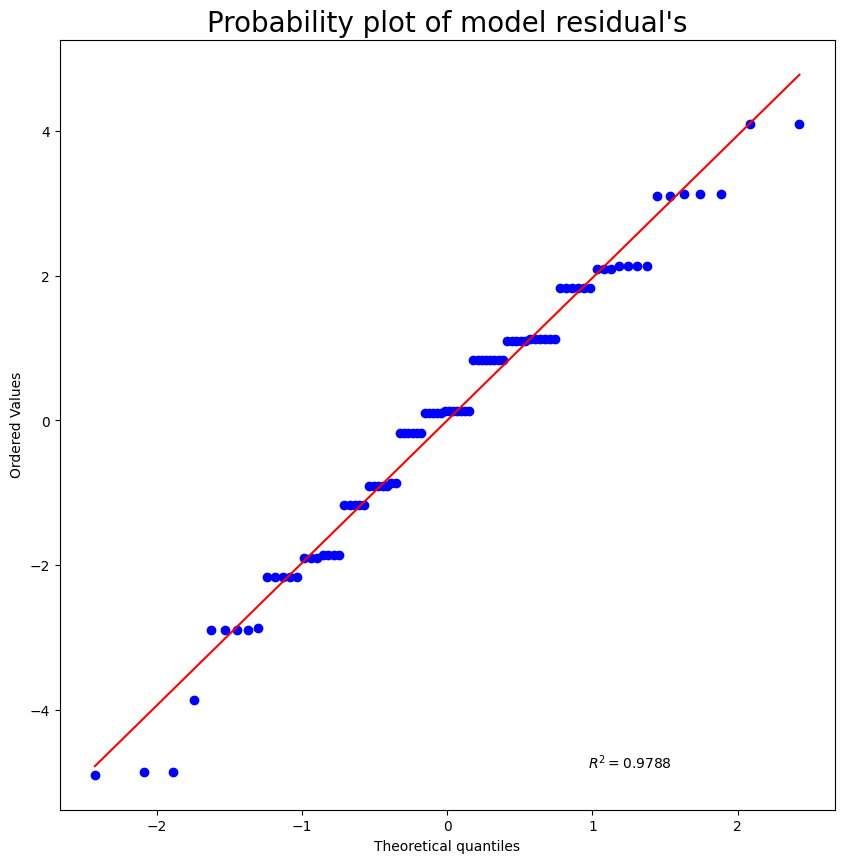

In [ ]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Install scipy package ##

#%pip install scipy ##

## Import scipy ##

import scipy.stats as stats

## Import Egg Rating Data ##

egg_data = pd.read_excel("Egg Rating.xlsx")

## Data Integrity Check ##

print(egg_data.info())

## Fit One Way ANOVA Model ##

egg_mod = ols("Rating~Technique",data=egg_data).fit()

## Extract Model Residuals ##

residuals = egg_mod.resid

## Generate QQ plot ##

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()


- Let's breakdown the code and then we'll discuss how to interpret this result:

    - `plt.figure(figsize=(10,10))` creates a new figure window for plotting, similar to when how we specified the boxplot using `seaborn`. `figsize=(10,10)` sets the width and height of the figure in inches.
    - `fig.add_subplot(111)` adds a signle subplot to the figure. The `111` means, 1 row, 1 columns ,and this is the 1st subplot.
        - This is useful when you want to organize multiple plots in a grid layout (similar to `par` in R).
    - `stats.probplot(residuls,plot=plt,rvalue=True)` generates a QQ plot.
        - `plot=plt` tells Python to use `Matplotlib` for plotting
        - `rvalue=True` tells Python to include the $R^2$ between the theoretical and empirical quantiles.
    - `ax.set_title` and `plt.show` do what it sounds like they do

- As we can see, most of the points fall near the line bisecting the graph.

- While we do have some deviation, it doesn't seem to be substantial nor a large number of points.

- Thus, I would conclude that the Q-Q plot gives us evidence in support of the normality assumption.
    -   Note, this can be subjective!

![Example of a Q-Q Plot](PP%20Plot.jpg)

###### Inferential Tests of Normality

- Now, let's perform a formal test of normality of the residuals.

- There exist many, many tests of normality (e.g., Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, etc.), but each of them has the same statistical hypotheses:

$$ H_0: \text{The Normality Assumption is Met} $$ 

$$ H_1: \text{The Normality Assumption is Not Met} $$

- One of my favorite tests is the Shaprio-Wilk Test, which we can perform using the `shapiro` function which is part of the `scipy` package in Python:

In [ ]:
## Perform Shapiro-Wilk Test of Normality ##
stats.shapiro(residuals)

ShapiroResult(statistic=np.float64(0.9763388856448503), pvalue=np.float64(0.09961610175575726))

- Here we get both the test statistic ($W=0.98$) as well as its associated p-value ($p=0.0996$).

- Since $p > \alpha = 0.05$, this tells us the data more strongly support the **null** hypothesis, meaning that the assumption of normality is supported by the data. 

- This result, along with a relatively good looking Q-Q plot, means that we can feel confident that the normality assumption is reasonably supported by our data.

##### Assumptions for One-Way ANOVA: Constant Variance

###### Scatterplot of Standardized Residuals vs Fitted Values

- To test the constant variance assumption graphically, I like to plot the predicted values for $y_{ij}$, which are just the group means, $\bar{y}_{i.}$, versus the *standardized residuals* (more on those in just a second.)

- This gives us a sort of boxplot whose width we can use as a rough estimate of variability.

- This is reasonable considering the estimate of $\sigma^2$, denoted $\hat{\sigma}^2$, is calculated by:

$$ \hat{\sigma}^2 = \frac{1}{n - t}\sum_{i=1}^{t}\sum_{j=1}^{r_t}\varepsilon_{ij} = \frac{1}{n - t}\sum_{i=1}^{t}\sum_{j=1}^{r_t}(y_{ij} - \bar{y}_{i\cdot})^2 $$

- Now back to the standardized residuals, they are just that: the raw residuals, $y_{ij} - \bar{y}_{i\cdot}$, divided by the square root of $\hat{\sigma}^2$. 

- Since we assume the residuals follow a normal distribution, this standardization process converts the raw residuals to a standard normal scale. 

    - This is easier to interpret.

- Let's see how we do generate this scatterplot in Python:

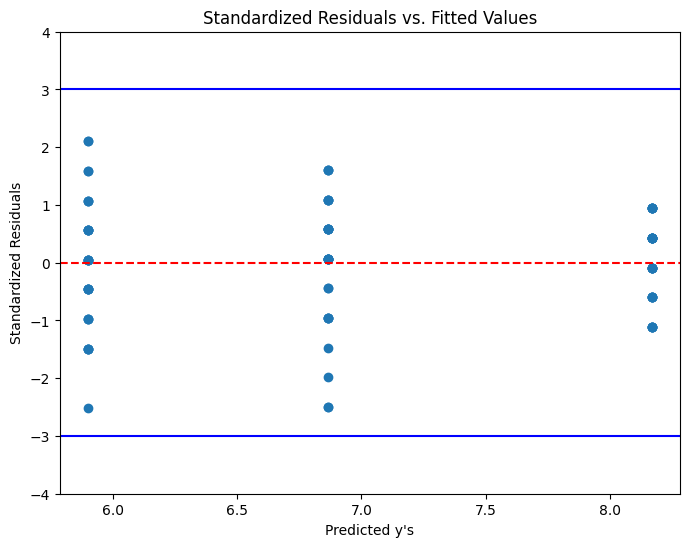

In [ ]:
## Obtain Standardized Residuals ##

standardized_residuals = egg_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = egg_mod.fittedvalues

## Create the plot ##

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()


- As we can see, for each group mean (shown by the vertical lines), the residuals are mostly centered around 0, which implies that the residual mean being approximately 0 seems reasonable.

- Additionally, while the residuals are not exactly the same width, they are not drastically different either.

- Thus, I would conclude that the constant variance assumption is reasonably supported by the data.
    -   Again, the visual technique is somewhat subjective!!

###### Inferential Tests of Constant Variance

- Like tests of normality, there exist a few variations (no pun intended) of inferential tests for evaluating constant variance among model residuals.

- However, many of them (such as the F-ratio test and Levene's Test), have specific model requirements that limit their use.

- This is why I instead recommend using the **Bruesch-Pagan Test**, which is a more general test that can be used to evaluate the constant variance assumption on *any* linear model based on the normality assumption, including multiple linear regression.

- Like the Shapiro-Wilk test, the B-P test has similar statistical hypotheses:

$$ H_0: \text{Variance is Constant} $$

$$ H_1: \text{Variance is Not Constant} $$

- Let's see how we can use the `het_breuschpagan` function from `statsmodels` to help us perform the test in Python:

In [ ]:
## Import necessary function: ##

from statsmodels.stats.diagnostic import het_breuschpagan

## Run B-P Test ##

bp_test = het_breuschpagan(egg_mod.resid,egg_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")



F-statistic: 3.2023449996911033
F p-value: 0.045504019517331455


- While the p-value associated with the B-P test is technically below our typically used threshold of 0.05 (which would mean the data more strongly support the alternative hypothesis of non-constant variance), I tend to be more flexible with the assumptions unless they are severely violated.

    - This is largely in part due to the principle of *robustness*. 
    - ANOVA methods are robust to minor violations of the assumptions.
    - This means that for slight assumption violations, we can still feel confident in interpreting and using the results of the inferential tests.

- Since our p-value is in the neighborhood of 0.05, and since the scatterplot of standardized residuals to fitted values looked reasonably good, I feel comfortable assuming the data support both our normality and constant variance assumption.

##### Assumptions for One-Way ANOVA: Independence of Observations

- The final assumption we have for One-Way ANOVA is that all of our observations are independent of one another.

- While we do have a test for this (Durbin-Watson test), I tend to rely on the sampling technique as the measure of independence.

- In the egg example, if we select our panel participants in a reasonably random manner and further use randomization to partition the participants into each of the cooking technique treatments, it is reasonable to assume that my assessment of an egg has nothing to do with your assessment of an egg.

- If I were to ask people who were coming out of a mosque or synagogue to be part of an experiment where I was cooking eggs in bacon grease, this isn't random and thus I couldn't rely on the results.

- In most laboratory science types of experiments (like the Dog Toy or Can Cooler example), independence of observations is generally pretty reasonable.

- We have to be more mindful of our sampling technique when working with human participants to ensure that independence can be reasonably assumed.
